# Covid-19 exploratory analysis

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import numpy as np

In [223]:
covidData = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
covidData.head(5)

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [224]:
brasilData = covidData[covidData['location'] == 'Brazil']
brasilData.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths
1085,2020-03-26,Brazil,232,11,2433,57
1086,2020-03-27,Brazil,482,20,2915,77
1087,2020-03-28,Brazil,502,15,3417,92
1088,2020-03-29,Brazil,487,22,3904,114
1089,2020-03-30,Brazil,352,22,4256,136


In [225]:
br_new_cases = brasilData[['date','new_cases','total_cases']]
br_new_cases.head()

,date,new_cases,total_cases
1002,2019-12-31,0,0
1003,2020-01-01,0,0
1004,2020-01-02,0,0
1005,2020-01-03,0,0
1006,2020-01-04,0,0


# Total cases x New Cases in Brazil

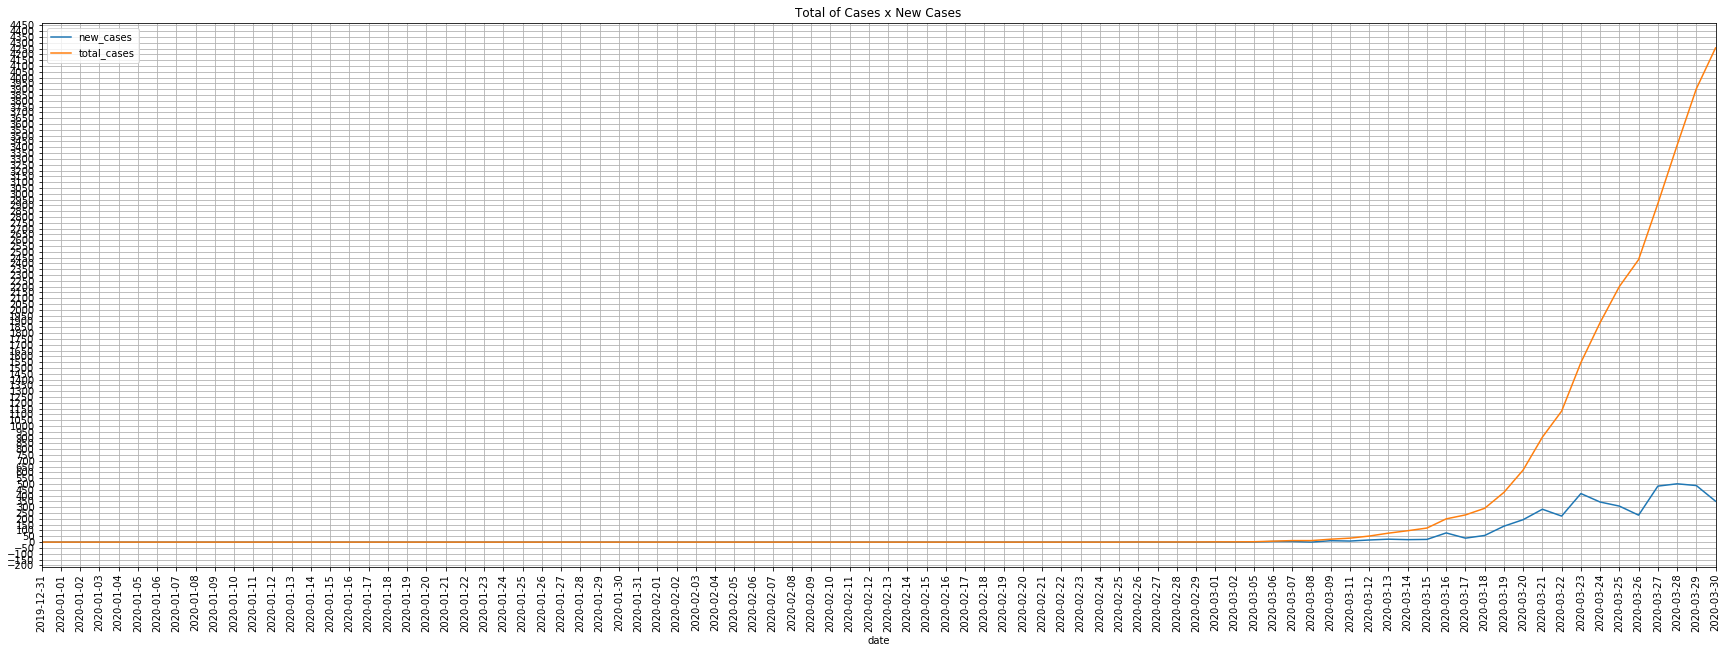

In [226]:
fig, ax = plt.subplots(figsize=(30,10))
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=50)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(yloc)
br_new_cases[['date','new_cases','total_cases']].plot(ax=ax, x='date', y=['new_cases','total_cases'])
plt.xticks(rotation='vertical')
plt.title('Total of Cases x New Cases')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Top 5 countries with most Covid cases

In [227]:
from datetime import date
totalOfCountries = 5
todayDate = date.today()
topCountriesMostCases = covidData[covidData['date'] == str(todayDate)].sort_values('total_cases',ascending=False).head(totalOfCountries + 1)
topCountriesMostCases

,date,location,new_cases,new_deaths,total_cases,total_deaths
7778,2020-03-30,World,58520,3128,715660,33579
7530,2020-03-30,United States,18360,318,143025,2509
3799,2020-03-30,Italy,5217,758,97689,10781
1507,2020-03-30,China,121,5,82463,3311
6645,2020-03-30,Spain,6549,838,78797,6528
2748,2020-03-30,Germany,4751,66,57298,455


In [228]:
topNames = topCountriesMostCases['location']

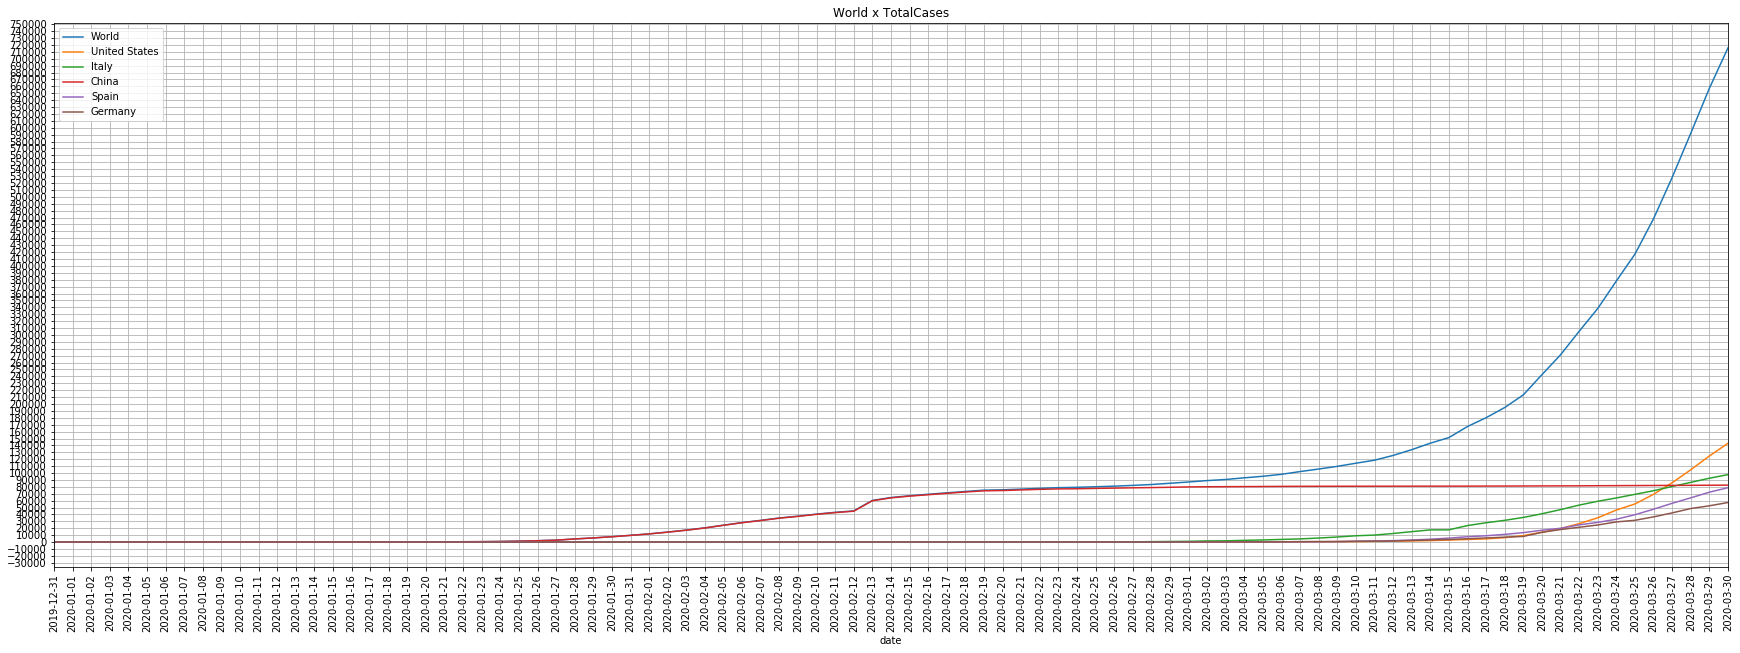

In [229]:
fig, ax = plt.subplots(figsize=(30,10))
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=10000)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(yloc)
for country in topNames:
    covidData[covidData['location'] == country][['date','total_cases']].plot(ax=ax, x='date', y=['total_cases'], label=[country])
plt.xticks(rotation='vertical')
plt.title('World x TotalCases')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Today data

In [230]:
brazilDf = covidData[covidData.location == 'Brazil']
brazilToday = brazilDf[brazilDf.date == str(todayDate)]
top_and_brazil = pd.concat([topCountriesMostCases, brazilToday])
top_and_brazil

,date,location,new_cases,new_deaths,total_cases,total_deaths
7778,2020-03-30,World,58520,3128,715660,33579
7530,2020-03-30,United States,18360,318,143025,2509
3799,2020-03-30,Italy,5217,758,97689,10781
1507,2020-03-30,China,121,5,82463,3311
6645,2020-03-30,Spain,6549,838,78797,6528
2748,2020-03-30,Germany,4751,66,57298,455
1089,2020-03-30,Brazil,352,22,4256,136


In [231]:
topCountriesOnlyNames = topNames.iloc[1:]
topCountriesOnlyAndBrazil = topCountriesOnlyNames.append(pd.Series('Brazil'))
topCountriesOnlyAndBrazil

7530    United States
3799            Italy
1507            China
6645            Spain
2748          Germany
0              Brazil
dtype: object

In [232]:
#fixing brazil lacking info for somedays, i.e: 03/03, 03/04 and 03/10
covidData = covidData.append({'date':'2020-03-03', 
                 'location': 'Brazil',
                 'new_cases': 0,
                 'new_deaths': 0,
                 'total_cases': 2,
                 'total_deaths': 0}, ignore_index=True)

covidData = covidData.append({'date':'2020-03-04', 
                 'location': 'Brazil',
                 'new_cases': 0,
                 'new_deaths': 0,
                 'total_cases': 2,
                 'total_deaths': 0}, ignore_index=True)

covidData = covidData.append({'date':'2020-03-10', 
                 'location': 'Brazil',
                 'new_cases': 12,
                 'new_deaths': 0,
                 'total_cases': 25,
                 'total_deaths': 0}, ignore_index=True)

covidData = covidData.sort_values('date', ascending=True)

## Total Cases

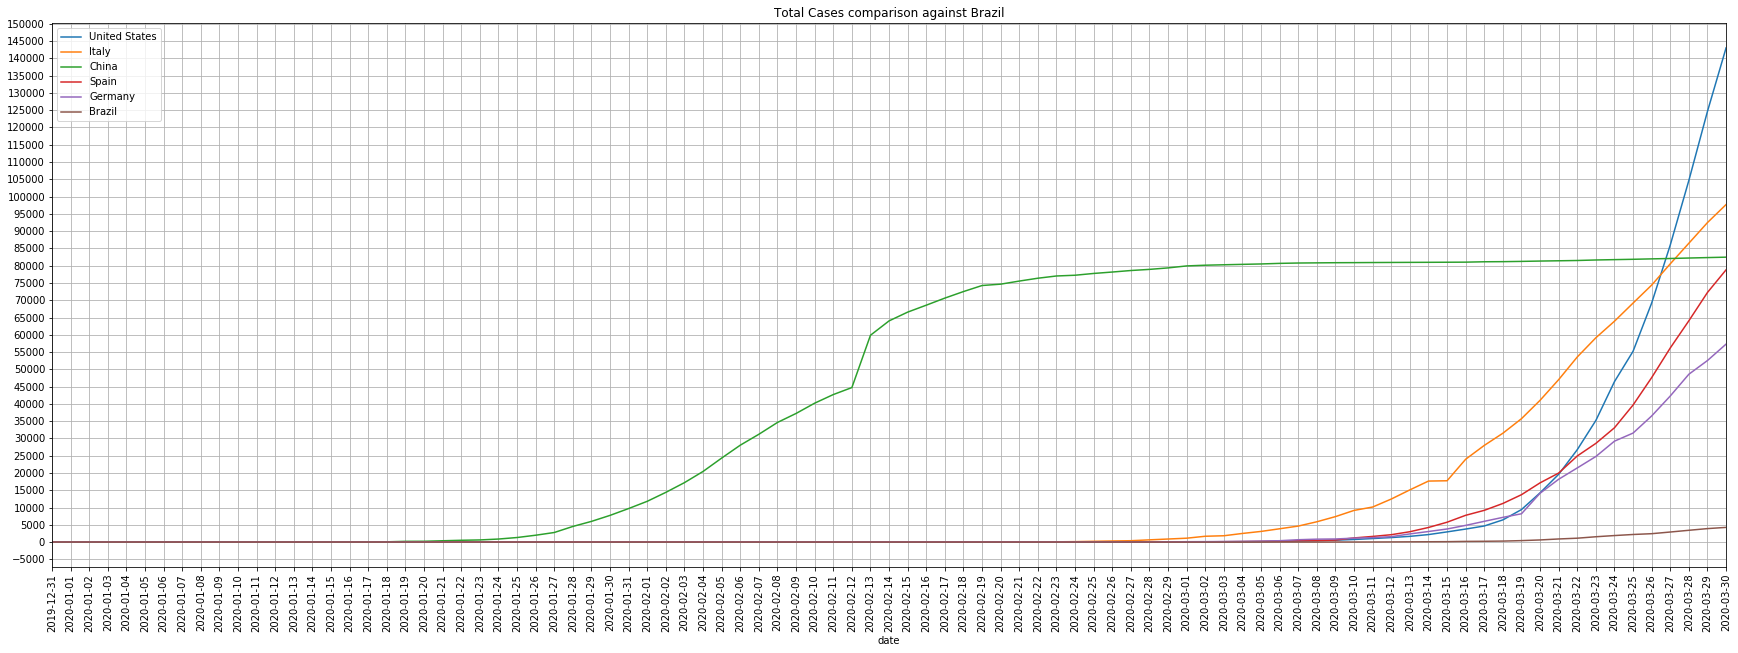

In [233]:
fig, ax = plt.subplots(figsize=(30,10))
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=5000)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(yloc)
for country in topCountriesOnlyAndBrazil:
    covidData[covidData['location'] == country][['date','total_cases']].plot(ax=ax, x='date', y=['total_cases'], label=[country])
plt.xticks(rotation='vertical')
plt.title('Total Cases comparison against Brazil')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## New cases per day

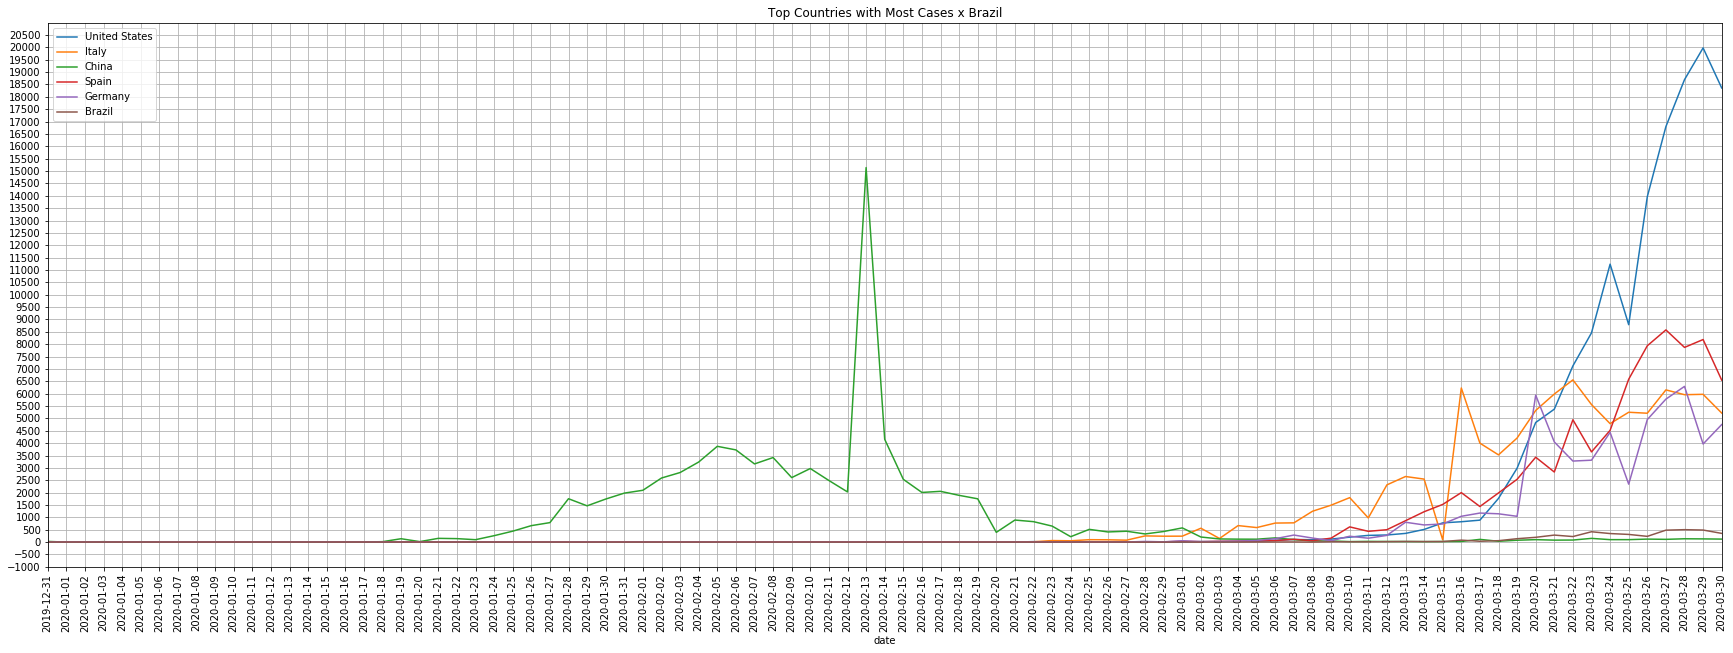

In [234]:
fig, ax = plt.subplots(figsize=(30,10))
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=500)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(yloc)
for country in topCountriesOnlyAndBrazil:
    covidData[covidData['location'] == country][['date','new_cases']].plot(ax=ax, x='date', y=['new_cases'], label=[country])
plt.xticks(rotation='vertical')
plt.title('Top Countries with Most Cases x Brazil')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Deaths per day

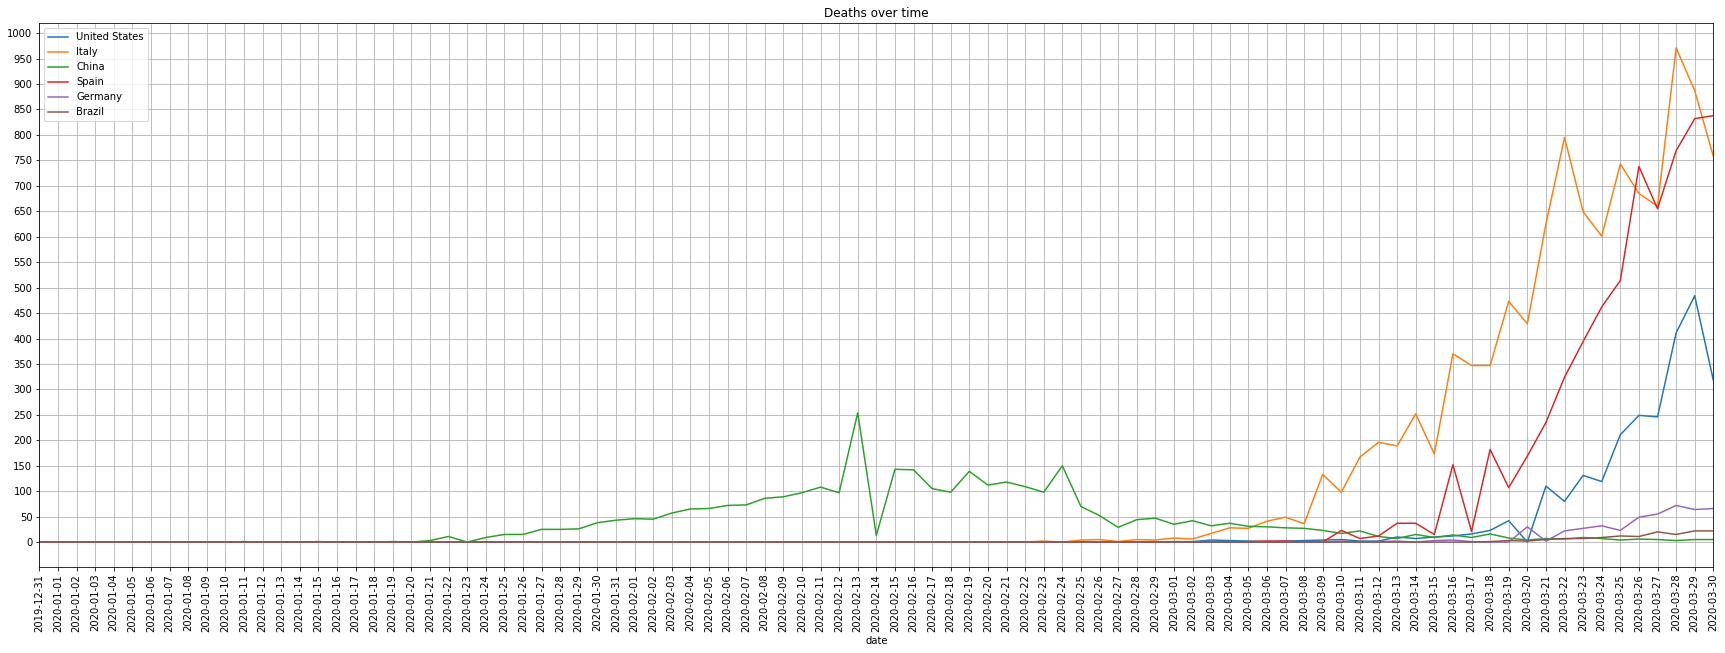

In [235]:
fig, ax = plt.subplots(figsize=(30,10))
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=50)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(yloc)
for country in topCountriesOnlyAndBrazil:
    covidData[covidData['location'] == country][['date','new_deaths']].plot(ax=ax, x='date', y=['new_deaths'], label=[country])
plt.xticks(rotation='vertical')
plt.title('Deaths over time')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
#brazil x south korea, germany, japan